<h3>1. Import module yang dibutuhkan</h3>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [2]:
imagePaths = 'dataset\\daun\\'
label_list = ['jambu_biji', 'pandan']
data = []
labels = []

In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(100, 32, 32, 3)

<h3>3. Data Preprocessing</h3>

In [5]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji'
 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'jambu_biji' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'p

In [7]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>4. Split Dataset</h3>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h3>5. Build CNN Architecture</h3>

In [10]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [12]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [13]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [14]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 2s 263ms/step - loss: 0.7003 - accuracy: 0.5500 - val_loss: 0.5678 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 70ms/step - loss: 0.6038 - accuracy: 0.5500 - val_loss: 0.5543 - val_accuracy: 0.9000
Epoch 3/100
3/3 [==============================] - 0s 78ms/step - loss: 0.5440 - accuracy: 0.8375 - val_loss: 0.4614 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 76ms/step - loss: 0.4146 - accuracy: 0.9500 - val_loss: 0.2818 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 75ms/step - loss: 0.3108 - accuracy: 0.9625 - val_loss: 0.2071 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 86ms/step - loss: 0.2261 - accuracy: 0.9625 - val_loss: 0.1040 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 59ms/step - loss: 0.1718 - accuracy: 0.9500 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 72ms/step - loss: 2.4808e-04 - accuracy: 1.0000 - val_loss: 6.6688e-05 - val_accuracy: 1.0000
Epoch 58/100
3/3 [==============================] - 0s 65ms/step - loss: 3.0640e-04 - accuracy: 1.0000 - val_loss: 6.6221e-05 - val_accuracy: 1.0000
Epoch 59/100
3/3 [==============================] - 0s 62ms/step - loss: 2.6792e-04 - accuracy: 1.0000 - val_loss: 6.1973e-05 - val_accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 80ms/step - loss: 3.1969e-04 - accuracy: 1.0000 - val_loss: 5.7486e-05 - val_accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 57ms/step - loss: 2.3907e-04 - accuracy: 1.0000 - val_loss: 5.5183e-05 - val_accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 59ms/step - loss: 1.4031e-04 - accuracy: 1.0000 - val_loss: 5.3440e-05 - val_accuracy: 1.0000
Epoch 63/100
3/3 [==============================] - 0s 64ms/step - loss: 3.9576e-04 - accuracy: 1.0000 - val_loss: 5.15

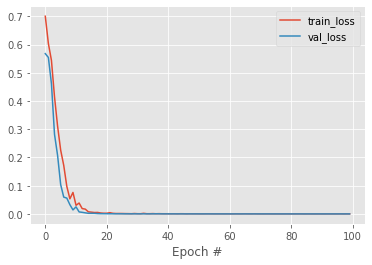

In [15]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [16]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

  jambu_biji       1.00      1.00      1.00        12
      pandan       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



C:\Users\user\AppData\Local\Temp/ipykernel_7288/954476436.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)


In [17]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_pandan.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.9999906]]


In [ ]:
if q_pred<=0.5 :
    target = "Jambu"
else :
    target = "Pandan"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose